In [1]:
#导入所需的模块
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#解决matplotlib汉字显示问题
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

In [3]:
data_original = pd.read_csv("./data/team_season.csv")

In [4]:
labels = ['罚球','罚球命中','罚球出手','失误','犯规','比分']
data = data_original.drop(labels = labels, axis = 1)

In [5]:
#添加赛季信息
def add_season(s):
    assert type(s) == str
    data = s.split('-')
    if int(data[1]) >= 7:
        return int(data[0]) + 1
    else:
        return int(data[0])

In [6]:
data['赛季'] = data['时间'].apply(add_season)

In [7]:
data.head()

,球队,时间,结果,主/客场,投篮,命中,出手,三分,三分命中,三分出手,篮板,前场,后场,助攻,抢断,盖帽,得分,赛季
0,CHI,1985-10-25,W,主,0.453,43,95,0.250,1,4,53,21,32,29,8,8,116,1986
1,CHI,1985-10-26,W,主,0.460,40,87,0.667,2,3,46,17,29,18,6,11,121,1986
2,CHI,1985-10-29,W,客,0.489,45,92,0.000,0,1,46,13,33,24,6,5,111,1986
3,CHI,1985-10-31,L,客,0.454,44,97,0.000,0,6,40,17,23,22,10,9,112,1986
4,CHI,1985-11-02,L,客,0.417,35,84,0.250,1,4,40,15,25,18,4,3,100,1986


In [25]:
#根据统计各赛季数据
data_season = data.groupby(data['赛季']).mean()
data_season.head()

,投篮,命中,出手,三分,三分命中,三分出手,篮板,前场,后场,助攻,抢断,盖帽,得分
赛季,,,,,,,,,,,,,
1986,0.490742,43.457317,88.812805,0.268014,0.936585,3.264024,43.650610,14.191463,29.459146,26.326220,8.806098,5.214024,110.926829
1987,0.483141,42.743293,88.746951,0.273748,1.407927,4.668293,43.929268,14.565244,29.364024,26.259756,8.640854,5.404268,110.018293
1988,0.483193,42.296341,87.790854,0.301673,1.580488,4.993902,43.498780,14.156707,29.342073,26.082317,8.448171,5.381707,108.518293
1989,0.481174,42.519164,88.652729,0.301818,2.128920,6.629501,44.033101,14.362369,29.670732,25.648664,9.049361,5.479094,109.552846
1990,0.480907,41.581654,86.706787,0.311998,2.235419,6.704136,43.177094,13.672853,29.504242,25.121421,8.519088,5.145811,107.550901


#### 1、由下图看出在1986-2016年之间，三分球占总分的比重整体趋势向上，说明球队对三分球的重视程度开始提高。

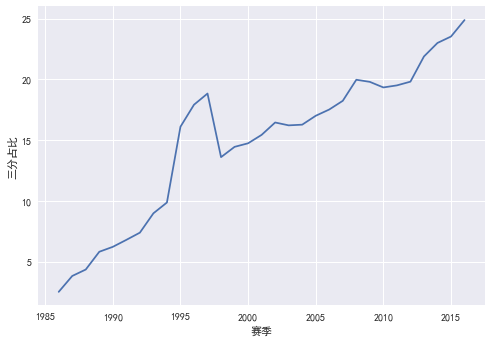

In [26]:
#三分球占总分的比例
data_season['三分比例'] = (data_season['三分命中'] * 3 / data_season['得分']) * 100
plt.plot(data_season['三分比例'])
plt.xlabel('赛季')
plt.ylabel('三分占比')

#### 2、借助seaborn分析三分球对结果的影响程度

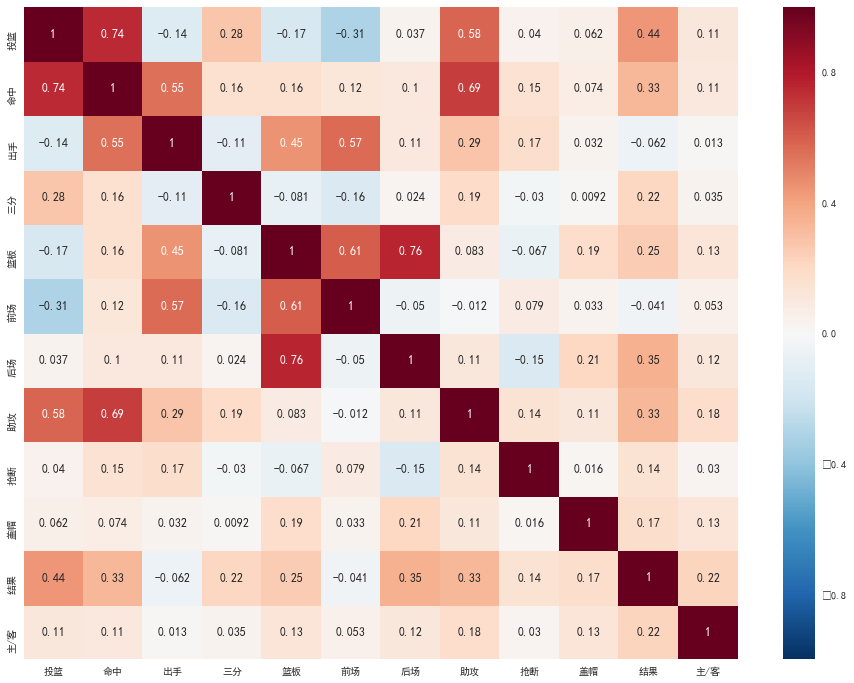

In [27]:
data_2 = data.loc[:,['投篮','命中','出手','三分','篮板','前场','后场','助攻','抢断','盖帽']]
data_2['结果'] = data['结果'].replace(['W','L'],[1,0])
data_2['主/客'] = data['主/客场'].replace(['主','客'],[1,0])
fig = plt.figure(figsize=(16,12))
import seaborn as sns
sns.heatmap(data_2.corr(),annot=True)

* 根据heatmap图可以看出，影响比赛结果的主要因素有：投篮（0.44）,后场(0.35),命中（0.33）,助攻（0.33），其中三分的影响率为0.22。

#### 3、2016赛季胜率前三的球队的三分球得分与该赛季平均三分球得分对比

In [30]:
data_season.corr()

,投篮,命中,出手,三分,三分命中,三分出手,篮板,前场,后场,助攻,抢断,盖帽,得分
投篮,1.000000,0.948374,0.841276,-0.727284,-0.693986,-0.704360,0.500455,0.678084,-0.358538,0.892231,0.599236,0.418107,0.954749
命中,0.948374,1.000000,0.969119,-0.818416,-0.717453,-0.717739,0.743132,0.696776,-0.174059,0.949349,0.686150,0.540219,0.982289
出手,0.841276,0.969119,1.000000,-0.819657,-0.673316,-0.665824,0.878881,0.654265,-0.009662,0.924703,0.699676,0.592350,0.935666
三分,-0.727284,-0.818416,-0.819657,1.000000,0.882221,0.870511,-0.715716,-0.798653,0.315057,-0.854897,-0.787556,-0.652289,-0.741587
三分命中,-0.693986,-0.717453,-0.673316,0.882221,1.000000,0.998932,-0.540424,-0.939582,0.626754,-0.817686,-0.802306,-0.759548,-0.614206
三分出手,-0.704360,-0.717739,-0.665824,0.870511,0.998932,1.000000,-0.519517,-0.938232,0.642948,-0.816520,-0.788938,-0.750505,-0.617997
篮板,0.500455,0.743132,0.878881,-0.715716,-0.540424,-0.519517,1.000000,0.538239,0.227257,0.750945,0.673101,0.640800,0.677158
前场,0.678084,0.696776,0.654265,-0.798653,-0.939582,-0.938232,0.538239,1.000000,-0.698422,0.847821,0.906173,0.808780,0.596432
后场,-0.358538,-0.174059,-0.009662,0.315057,0.626754,0.642948,0.227257,-0.698422,1.000000,-0.341954,-0.475483,-0.390376,-0.114137
助攻,0.892231,0.949349,0.924703,-0.854897,-0.817686,-0.816520,0.750945,0.847821,-0.341954,1.000000,0.838233,0.682819,0.901235


In [28]:
team_season = []
for year in range(2016,2017):
    temp = data[data['赛季']==year]#选取该赛季所有球队的信息
    temp_team_name = temp['球队'].drop_duplicates()#该赛季所有球队的名称
    
    #根据球队名称进行分组，然后通过循环球队名称获得每个球队的该赛季的所有数据信息
    temp_team = temp.groupby('球队')
    for t in temp_team_name:
        team_season.append(temp_team.get_group(str(t)))
        
Win = []
Lost = []
three_success_rate = []
three_success_time = []
three_success_try = []

for i in range(len(team_season)):
    res = team_season[i].结果.value_counts()
    Win.append(res['W'])
    Lost.append(res['L'])
    three_success_rate.append(team_season[i].三分.mean())
    three_success_time.append(team_season[i].三分命中.mean())
    three_success_try.append(team_season[i].三分出手.mean())
season_2016 = pd.DataFrame([Win, Lost,three_success_rate,three_success_time,three_success_try], columns=temp_team_name,index = ['Win','Lost','3_rate','3_time','3_try']).T
season_2016['Win Rate'] = b['Win']/(b['Win'] + b['Lost'])
season_2016.sort_values(by = 'Win Rate',ascending=False)

,Win,Lost,3_rate,3_time,3_try,Win Rate
球队,,,,,,
GSW,73.0,9.0,0.414024,13.134146,31.621951,0.890244
SAS,67.0,15.0,0.380000,6.951220,18.500000,0.817073
CLE,57.0,25.0,0.362610,10.731707,29.585366,0.695122
TOR,56.0,26.0,0.366817,8.634146,23.317073,0.682927
OKC,55.0,27.0,0.349866,8.268293,23.731707,0.670732
LAC,53.0,29.0,0.365134,9.719512,26.707317,0.646341
BOS,48.0,34.0,0.335415,8.743902,26.121951,0.585366
CHA,48.0,34.0,0.361451,10.646341,29.402439,0.585366
ATL,48.0,34.0,0.351549,9.939024,28.378049,0.585366


* 根据2016赛季排名前3的球队，可以看出排名前3的球队在三分球的出手次数和成功率都维持在较高水平。

4、根据1986-2016期间，求三分球命中率与比赛胜率直接的相关系数

In [188]:
season_2016_3_rate = season_2016['3_rate'].values
season_2016_Win_Rate = season_2016['Win Rate'].values

cofficient = pd.DataFrame([season_2016_3_rate, season_2016_Win_Rate]).T
cofficient.corr()

,0,1
0,1.00000,0.67088
1,0.67088,1.00000


* 根据以上分析可以看出，近些年三分球的在比赛中的影响力整体趋势提高；
* 三分球对比赛结果产生一定的正向影响。